# **SME0142 - Álgebra Linear e Aplicações**
Docente: Cynthia de Oliveira Lage Ferreira


# **Trabalho Prático**
16 de novembro de 2022

# Aluno:
Vinícius de Moraes - 13749910

# Orientações Gerais

*   Esta avaliação é **individual** e deverá ser desenvolvida na plataforma Colab (https://colab.research.google.com/).

*   Cada aluno deverá produzir um arquivo .ipynb contendo as soluções dos exercícios. Sejam organizados !

*   Os arquivos deverão estar identificados por **NOMEDOALUNO-NoUSP-TURMA.ipynb** a fim de facilitar a organização das atividades pela professora.

*  Os arquivos deverão ser enviados **até às 20h do dia 19/11** através da plataforma e-disciplinas da USP (https://edisciplinas.usp.br/). **Os arquivos recebidos por e-mail não serão corrigidos.** Arquivos enviados fora do prazo também não serão corrigidos!

*   Apenas os alunos que estiverem com a **situação regularizada no Sistema Jupiter** terão suas avaliações corrigidas.

*  Todos os códigos utilizados para resolver os problemas deverão ser apresentados, executados e minimamente comentados. **Questões com respostas sem justificativas não serão consideradas.**

**BOA PROVA!**

In [386]:
#Bibliotecas Utilizadas
import numpy as np
import matplotlib.pyplot as plt
import math

# **Exercício 1**
Considere o espaço vetorial real $\mathbb{R}^2$. Sejam as transformações
- $T_1:\mathbb{R}^2 \to \mathbb{R}^2$ tal que $T_1(x,y)=(-x,y)$ - **reflexão em torno do eixo $oy$**;
- $T_2:\mathbb{R}^2 \to \mathbb{R}^2$ tal que a matriz da transformação é dada por
$$[T_2] = \begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix},$$
com $k\in\mathbb{R}$ - **cisalhamento horizontal**.

1. Aplique as transformações $T_1$ e $T_2$ no quadrado de vértices $(0,0)$, $(1,0)$, $(1,1)$ e $(0,1)$ considerando o parâmetro $k= -0,5$ e visualize os resultados;
2. Determine a matriz da transformação $T_3$ que primeiro faz um cisalhamento horizontal com $k=-0.5$ mapeando $e_2$ em $e_2 - 0.5e_1$ ($e_1$ se mantém inalterado) e então reflete o resultado em torno do eixo $oy$. **Dica:** Determine a posição final das imagens de $e_1$ e $e_2$.
3. Qual a relação entre as matrizes $[T_1]$, $[T_2]$ e a matriz da transformação $[T_3]$ obtida no item anterior?
4. Determine a transformação de reflexão em torno do eixo $ox$ e a transformação de cisalhamento vertical.

Text(0.5, 1.0, 'Cisalhamento')

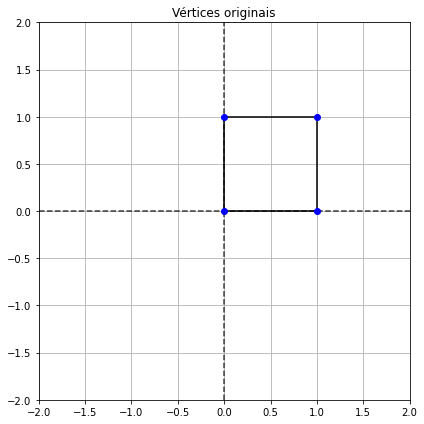

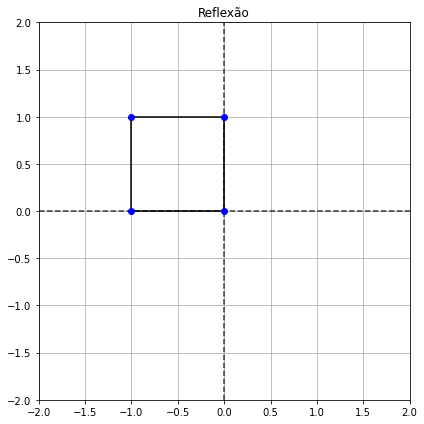

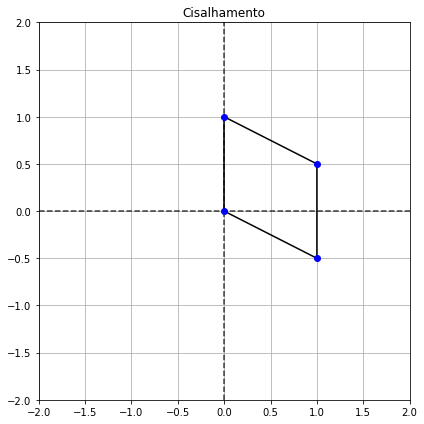

In [387]:
# Solução 1
# Vértices do quadrado

Q = np.array([[0,0],[1,0],[1,1],[0,1]]).T

# Reflexão em torno do eixo y
# (-x,y) = x(-1,0) + y(0,1)
T1 = np.array([[-1, 0], [0, 1]]).T

# Cisalhamento horizontal
T2 = np.array([[1,-0.5], [0,1]]).T

# Aplicando as transformações
T1Q = T1@Q
T2Q = T2@Q

def plotSimples(vx, vy):
  plt.figure(figsize=(6,6))
  plt.axis([-2, 2, -2, 2])
  plt.plot([-2,2], [0,0], 'k--', alpha=0.75)
  plt.plot([0,0], [-2,2],'k--', alpha=0.75)
  plt.plot(vx, vy, 'k')
  plt.plot([vx[0], vx[-1]], [vy[0], vy[-1]], 'k')
  plt.plot(vx, vy, 'bo')
  plt.grid('True')

# Plots
plotSimples(Q[0,:], Q[1,:])
plt.title('Vértices originais')

plotSimples(T1Q[0,:], T1Q[1,:])
plt.title('Reflexão')

plotSimples(T2Q[0,:], T2Q[1,:])
plt.title('Cisalhamento')

[[-1.   0. ]
 [ 0.5  1. ]]

[[-1.   0. ]
 [ 0.5  1. ]]
-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=


Text(0.5, 1.0, 'Cisalhamento vertical')

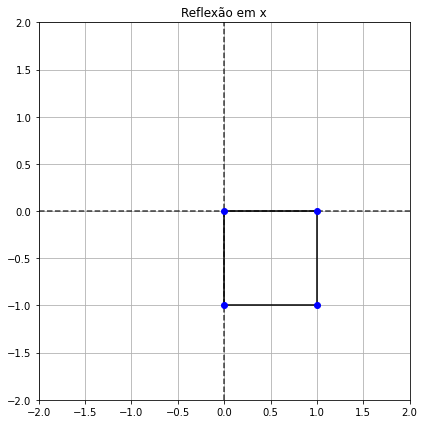

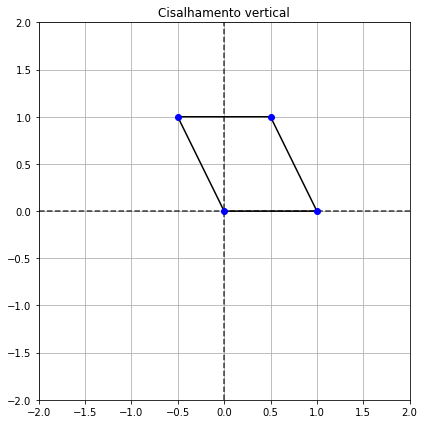

In [388]:
#Solução 2)
# Observando as posições finais de e1 e e2 temos:
# T3(1,0) = (-1,0)
# T3(0,1) = (0.5,1)
T3 = np.array([[-1,0], [0.5,1]])
print(T3)

# Solução 3)
# Por outro lado, aplicando T2, depois T1

# T3 é igual a multiplicação das matrizes T1 e T2
IGUAL_T3 = T2@T1
print()
print(IGUAL_T3)
print('-='*50)

# Solução 4)
# Reflexão em torno do eixo x
T4 = np.array([[1, 0], [0, -1]]).T

# Cisalhamento vertical
T5 = np.array([[1,-0.5], [0, 1]])

# Aplicando as transformações
T4Q = T4@Q
T5Q = T5@Q

# Plots
plotSimples(T4Q[0,:], T4Q[1,:])
plt.title('Reflexão em x')

plotSimples(T5Q[0,:], T5Q[1,:])
plt.title('Cisalhamento vertical')

# **Exercício 2** 
Considere a transformação $T:R^7 \rightarrow R^3$ linear dada pela matriz

$$
\left(\begin{array}{ccccccc}
3 & 9 & 6 & 6 & 9 & 3 & 1\\
2 & 0 & 9 & 2 & 0 & 5 & 3\\
0 & 0 & 1 & 0 & 1 & 0 & 2
\end{array}\right)
$$

a) Qual a dimensão do núcleo e da imagem da transformação? Faça um código para determinar a dimensão da imagem e conclua, então, a dimensão do núcleo. 
 
b) Encontre uma base para o espaço núcleo.

c) Faça um código para verificar que a base encontrada está gerando o núcleo.

In [389]:
B = np.asarray([[3, 9, 6, 6, 9, 3, 1],
                [2, 0, 9, 2, 0, 5, 3],
                [0, 0, 1 , 0, 1, 0, 2]])


# a) 
B = np.array([B[1], B[0], B[2]]) #L1 <- L2
B = np.array([np.divide(B[0],2), B[1], B[2]]) # L1 <- L1/2
B = np.array([B[0], np.subtract(B[1], np.dot(B[0], 3)), B[2]]) # L2 <- L2 - L1*3
B = np.array([B[0], np.divide(B[1], 9), B[2]]) # L2 <- L2/9
B = np.array([B[0], np.add(B[1], np.dot(B[2], 5/6)), B[2]]) # L2 <- L2 + L3*(5/6)
B = np.array([np.add(B[0], np.dot(B[2], -4.5)), B[1], B[2]]) # L1 <- L1 + L3*(-4.5)

print(B)

print()
Transversa = B.T
print(Transversa)

[[ 1.          0.          0.          1.         -4.5         2.5
  -7.5       ]
 [ 0.          1.          0.          0.33333333  1.83333333 -0.5
   1.27777778]
 [ 0.          0.          1.          0.          1.          0.
   2.        ]]

[[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.          0.          1.        ]
 [ 1.          0.33333333  0.        ]
 [-4.5         1.83333333  1.        ]
 [ 2.5        -0.5         0.        ]
 [-7.5         1.27777778  2.        ]]


**a)** Como temos que [[1,0,0],[0,1,0],[0,0,1]] é a base canônica de R^3, podemos concluir que o resto da matriz é linearmente dependente dessa base, logo a Imagem é igual a 3.

Seguindo essa lógica, pelo Teorema do Núcleo e da Imagem:

> dim(U) = dim(Ker(T)) + dim(Im(T))

Temos que a dim(U) = 7 e a dim(Im(T)) = 3, assim, chegamos a conclusão que a dimensão do núcleo é 4





In [390]:
#b)
Geradora = Transversa[(3,4,5,6), :]
Geradora *= -1

Identidade = np.array([[1,0,0,0],
                       [0,1,0,0],
                       [0,0,1,0],
                       [0,0,0,1]])

Kernel = np.concatenate((Geradora, Identidade), axis=1)
print(Kernel)

[[-1.         -0.33333333 -0.          1.          0.          0.
   0.        ]
 [ 4.5        -1.83333333 -1.          0.          1.          0.
   0.        ]
 [-2.5         0.5        -0.          0.          0.          1.
   0.        ]
 [ 7.5        -1.27777778 -2.          0.          0.          0.
   1.        ]]


In [400]:
#c)
for i in range(4):
  vetor_temporario = np.random.randint(-100,100)*Kernel[0,:]
  vetor_temporario2 = np.random.randint(-100,100)*Kernel[1,:]
  vetor_temporario3 = np.random.randint(-100,100)*Kernel[2,:]
  vetor_temporario4 = np.random.randint(-100,100)*Kernel[3,:]

  resultado = vetor_temporario + vetor_temporario2 + vetor_temporario3 + vetor_temporario4
  
  transformacao = B@resultado
  print(transformacao)

[ 0.00000000e+00 -2.84217094e-14  0.00000000e+00]
[0. 0. 0.]
[0. 0. 0.]
[0. 0. 0.]


Como todos deram 0, isso significa que a matriz encontrada é de fato o Kernel

# **Exercício 3**

a) Dada uma base qualquer de um subespaço vetorial do $R^{n}$, escreva um código para encontrar uma base ortonormal para este subespaço. Teste o seu código para a base dada pelas colunas da matriz  **V**  gerada no código abaixo. 

b) Faça um teste para verificar que a base obtida é de fato ortonormal.

In [392]:
V = np.random.randint(0,20,size=(20,10))
print(V)

[[ 4 17  1 12 15 16  5  8 19 14]
 [13 10  9  3 16  2  4  5  6  7]
 [17  5  5 19 18  8 12  5  3  9]
 [11  6  7  3 14 16 11 18 19 13]
 [ 8  4 11  7  5 10 10  8  4 19]
 [13 13 16 11 16  3  8 16  5  6]
 [17 18 12  8 11 17  9  7  6 14]
 [17  1 16 13 19 19 10  9  5 11]
 [14 13 15  3 12  0  2 16  0 11]
 [ 0  4  1  0  6 14 13 15  6  8]
 [13 11 18 12 10 14  4  1 13  4]
 [ 7 15 19  9 11  5  3 17  9  3]
 [ 5 15 12  3 10 18 13 14  3 14]
 [12 18  4  5 18 18  3  7  9  7]
 [10  8  9  8 12 13 19  3 10  9]
 [13 16  2 18  4  4 13 14 19 15]
 [14 17  3 17  6  5  9  1 15 17]
 [ 0  1  7 17 15 11 16 11 15 14]
 [ 4  6 11 14 16  1 17 10  2  3]
 [13 11 14 15 16  2  4 18 15 17]]


**Formula do coeficiente**

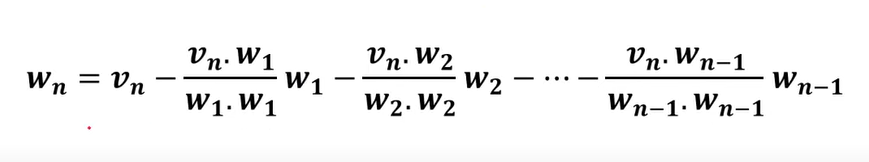

**Normalização de um vetor:**

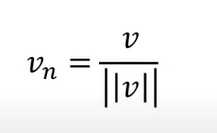

In [393]:
# a) Ortonormalização de uma base qualquer dada e teste do código em V

def coeficiente_gram_schmidt(v, n, w):
  coeficiente = v[n]
  for i in range(n):
    if(i != n):
      coeficiente = np.subtract(coeficiente, np.dot(np.divide(np.inner(v[n], w[i]), np.inner(w[i], w[i])), w[i]))
  return coeficiente

def gram_schmidt(v):
  base_ortogonal = []
  for i in range(len(v)):
    vetor_temporario = coeficiente_gram_schmidt(v, i, base_ortogonal)
    base_ortogonal.append(vetor_temporario)
  
  return base_ortogonal

def ortonormalizar(v):
  base_ortonormal = []
  for i in range(len(v)):
    vetor_temporario = np.divide(v[i], math.sqrt(np.inner(v[i], v[i])))
    base_ortonormal.append(vetor_temporario)
  return base_ortonormal

Q = ortonormalizar(gram_schmidt(V))
for i in range(len(Q)):
  print(Q[i])

[0.10072659 0.42808802 0.02518165 0.30217978 0.37772472 0.40290637
 0.12590824 0.20145319 0.47845132 0.35254308]
[ 0.60428763  0.06943863  0.46859692 -0.1751198   0.45756658 -0.34393656
  0.07889321  0.04891869 -0.20824585 -0.01103034]
[ 0.24935127 -0.38801841 -0.15250362  0.69629532  0.03675886  0.12971756
  0.37792011 -0.06012896 -0.33812405 -0.015372  ]
[ 0.12471636 -0.51726355  0.12389059 -0.35538593 -0.17150525  0.25399344
  0.31346026  0.57615581  0.22280097  0.03816236]
[-0.1247351   0.07231192  0.43643693  0.00600702 -0.38485083  0.0426258
  0.0808134  -0.10405303 -0.30907005  0.72518246]
[-0.28337447  0.29794312  0.36527491  0.3650831  -0.17303267 -0.17051905
 -0.01581821  0.59146645 -0.15444037 -0.36230613]
[ 0.40167302  0.38881173  0.01999639 -0.17359391 -0.35471978  0.5851444
  0.03661743 -0.11231433 -0.25457165 -0.33161327]
[-0.25182087 -0.35102054  0.49225858  0.06856189  0.32741735  0.47926635
 -0.40623046 -0.18355713 -0.05814328 -0.16539706]
[ 0.19793537 -0.04324866 -0.

In [394]:
# b) Teste que verifica se a base obtida é de fato ortonormal

teste_ortonormalizacao = 1
for i in range(len(Q)):
  teste_ortonormalizacao /= abs(np.inner(Q[i], Q[i]))

print(teste_ortonormalizacao)

1.0000000000000004


In [395]:
teste_ortogonalizacao = 0

for i in range(len(Q)-1):
  print(np.inner(Q[i], Q[i+1]))
print(teste_ortogonalizacao)

-1.0581813203458523e-16
2.6899055899365365e-16
-2.194425197110661e-16
4.5102810375396984e-17
3.885780586188048e-16
-6.938893903907228e-16
-4.579669976578771e-16
-6.245004513516506e-16
-3.3480163086352377e-16
0.06309552163763704
1.0
0.9999999999999999
-0.9999999999999998
1.0000000000000002
1.0000000000000002
1.0
1.0
1.0
1.0
0


O módulo do produto interno do vetor com ele mesmo é igual a 1 para todos os vetores, logo poderiamos concluir que a base obtida é de fato ortonormal, porém quando se faz o teste de ortogonalização, vemos que o produto interno obtido entre os vetores não é sempre 0, alguns são extremamente próximos e outros são iguais a 1, o que julgo ser um problema de execução do python, pois a lógica da função faz sentido em relação ao processo de ortogonalização de gram-schmidt, além de ter retornado os valores corretos em outros testes prontos

# **Exercício 4**

O crescimento populacional do Brasil ao longo dos anos pode ser observado na tabela abaixo, de acordo com dados do Censo-IBGE: 


Ano | População (milhões)
--- | :---: 
1872 | 9,9
1890 | 14,3
1900 | 17,4
1920 | 30,6
1940 | 41,2
1950 | 51,9
1960 | 70,9
1970 | 94,5
1980 | 121,1
1991 | 146,9
2000 | 169,5
2010 | 190,7


Tabela: *População do Brasil, em milhões de pessoas, entre os anos de 1872-2010. Dados Censo-IBGE.*



O último Censo foi realizado em 2010 e, devido à pandemia da Covid-19, o de 2020 foi adiado. Por isso, não é possível saber, com maior precisão, a população atual do país. Com o objetivo de estimar a população do Brasil em 2022, ajuste, no sentido dos mínimos quadrados, uma reta e uma parábola aos dados representados na tabela.

a) Qual das duas aproximações você considera melhor para estimar a população atual do país ? Justifique a sua resposta calculando o erro da aproximação. Mostre, também, os gráficos das duas aproximações obtidas.

b) Qual seria a população estimada do Brasil em 2022 ? Justifique.

Soma de aproximação da linha: [5123.65193401]
Soma de aproximação da parábola: [249.30911391]

-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  from ipykernel import kernelapp as app


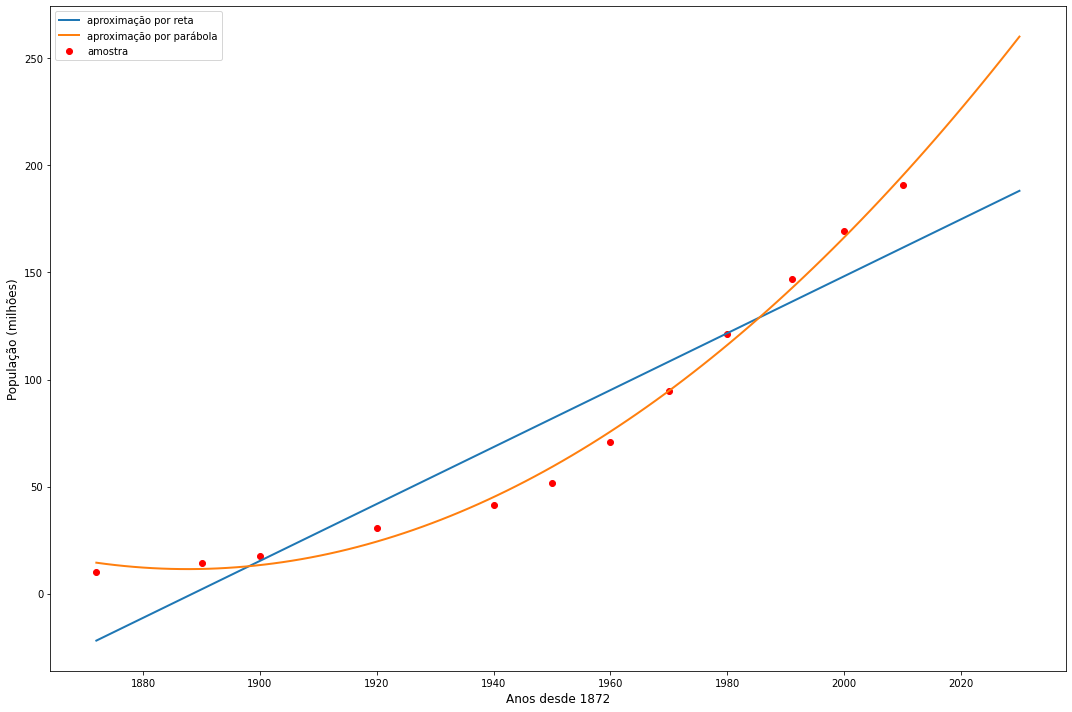

In [396]:
x = np.array([1872, 1890, 1900, 1920, 1940, 1950, 1960, 1970, 1980, 1991, 2000, 2010])
y = np.array([9.9, 14.3, 17.4, 30.6, 41.2, 51.9, 70.9, 94.5, 121.1, 146.9, 169.5, 190.7])

G = np.stack([x, np.ones(x.shape)]).T
mhat, residuals, rank, s = np.linalg.lstsq(G, y)
Xpred = np.linspace(1872, 2030, num=100)
Gpred = np.stack([Xpred, np.ones(Xpred.shape)]).T
Ypred = np.dot(Gpred,mhat)
print("Soma de aproximação da linha: {}".format(residuals))

plt.scatter(x,y,label = 'amostra',linewidth = 1,color='red')
plt.plot(Xpred,Ypred,label = 'aproximação por reta',linewidth = 2)

G = np.stack([np.square(x), x, np.ones(x.shape)]).T
mhat, residuals, rank, s = np.linalg.lstsq(G, y)
Gpred = np.stack([np.square(Xpred), Xpred, np.ones(Xpred.shape)]).T
Ypred = np.dot(Gpred,mhat)
print("Soma de aproximação da parábola: {}".format(residuals))
print()
print('-='*50)
print()

plt.plot(Xpred,Ypred,label = 'aproximação por parábola',linewidth = 2)
plt.xlabel('Anos desde 1872',fontsize='large')
plt.ylabel('População (milhões)',fontsize='large')
plt.legend()
plt.show()

**a)** De acordo com a estimativa de erro da aproximação, a parábola apresenta uma estimativa de erro menor do que a linha, assim, a parábola é a função que melhor representa o crescimento populacional do Brasil. Além disso, o gráfico plotado acima demonstra visualmente que, de fato, a parábola é a que melhor se encaixa nos dados da amostra.

In [397]:
print("População em {}: {}".format(round(Xpred[94]), Ypred[94]))

População em 2022: 233.0641128700372


**b)** De acordo com a função mais próxima da amostra, a parábola, a população brasileira estimada para 2022 é de cerca de 233 milhões de pessoas 